<a href="https://colab.research.google.com/github/elysethulin/PRACTICE/blob/master/Regression_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression and Naive Bayes

This notebook contains code to test, evaluate, and explore regression and Naive Bayes models in Python. The notebook is split into the followin main sections:

1. Linear Regression
2. Multiple Linear Regression
3. Binary Regression
4. Ridge Regression
5. Naive Bayes Models

Author: Joshua Pickard (jpic@umich.edu)

Adapted from a collaboration Ning Peng's original work

### Import packages

In [ ]:
import pandas as pd   # Data handling
import numpy as np    # Numerical Python

# Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
from mlxtend.plotting import plot_decision_regions

# Machine Learning Imports
from sklearn import metrics         # Evaluation model performance (accuracy, precision, etc.)
from sklearn import model_selection # Cross validation, hyperparameter tuning, etc.
from sklearn import linear_model    # Linear models (regression) 
from sklearn import naive_bayes     # Naive Bayes
from sklearn.datasets import make_blobs # Data generation

# Linear Regression

In [ ]:
# Load data
df_1 = pd.read_csv('https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_10/data/dataset1.txt', delimiter = ",")

# Verify data loaded correctly
print('Number of Samples: ', len(df_1))
print(df_1.head())

Number of Samples:  28
   SBP  Age
0  144   39
1  138   45
2  145   47
3  162   65
4  170   67


We will need to extract X and Y from the dataset by making a subset of the dataframe

In [ ]:
# Extract each variable from the data frame
Y = df_1.SBP
X = df_1.Age
X = np.array(X).reshape(-1,1)

### Scatter plot
Scatter plot helps us visualize the relationship between dependent and independent variables.

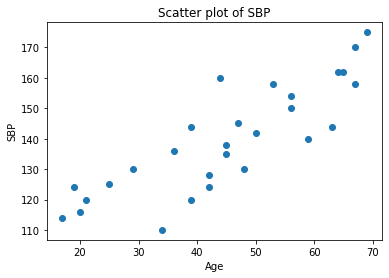

In [ ]:
# Create a scatterplot to further visualice the relationship between
# SBP and Age
plt.scatter(X, Y)   # Plot data
plt.xlabel('Age')   # X axis label
plt.ylabel('SBP')   # Y axis label
plt.title('Scatter plot of SBP')  # Plot title
plt.show()


As you can see, there is a strongly positive correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line.

## Model building

The `sklearn` model building process is similar for almost all types of models. It uses the following steps:
1. Specify which type of machine learning model you want
2. Fit the model to your training data
3. Predict labels of the test data
4. Evaluate the predictions

In [ ]:
# 1. Specify model type: LinearRegression
linear_regression_model = linear_model.LinearRegression()

# 2. Fit the model to your data
linear_regression_model.fit(X, Y)

In [ ]:
# When we want to retrive some information in the fitted model
# we can use model_name.variableToBeRetrived_
intercept = linear_regression_model.intercept_
slope = linear_regression_model.coef_
print('intercept:', intercept)
print('slope:', slope)

In [ ]:
# 3. Predict labels of data
y_pred = linear_regression_model.predict(X)
# Under the hood: y_pred = intercept + slope * X

In [ ]:
# Visualize regression
plt.xlabel('SBP', fontsize=15)
plt.ylabel('Age', fontsize=15)

# Prediction
plt.scatter(X, Y, c='blue')
plt.scatter(X, y_pred, c='black')
plt.plot(X, y_pred, c = 'red', linewidth=5, alpha=.5)
plt.title('Fit Linear Regression Model')
plt.legend(['Model', 'Data', 'Predictions'])
plt.show()


## Evaluation metric
For regression, we measure the distance between the predicted and actual answers. The shorter the distance, the more correct the model is. These are 3 popular evaluation metrics for regression
  * `Mean Absolute Error`: absolute value of the mean difference between all predicted and true values
  * `Means Squared Error`: mean squared difference between predicted and true values
  * `R2`: the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [ ]:
# MSE 
MSE = metrics.mean_squared_error(Y, y_pred)
print('MSE:', MSE)

# MAE 
MAE = metrics.mean_absolute_error(Y, y_pred)
print('MAE:', MAE)

# 𝑅²
r_sq = linear_regression_model.score(X, Y)
print('R squrare:', r_sq)

To recap, in the above section we took the following steps:
1. Loaded in a dataset
2. Visualize and explore the data
3. Separated the data from the labels
4. Constructed a regression model with the following steps:
  - Specified the model type
  - `model.fit(X,y)` the model to our data
5. Made predictions with the model using the function `model.predict(X)`
6. Evaluated the model's performance

These 5 steps will be the main steps used in the remainder of the notebook as we explore different types of regression and Naive Bayes models. Additionally, we will also focus on how to deal with various issues in data.


# Multiple linear regression

The goal in this section will be predicting the birth weight of an infant (oz) based on the mother’s smoking during pregnancy (pack/day) and mother’s age at childbirth (years) on birth weight of their infants (oz).

This section uses the main steps we previewed above, but also introduces 2 important parts of handling data:
1. Removing unrelated variables
2. Partitioning our data for training versus testing

In [ ]:
# Load data
df_2 = pd.read_csv('https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_10/data/smoke.csv')
# View data structure
df_2.head()

The `ID` attribute in our data is assigned to each patient, but doesn't contain relevant information to predicting the birth weight. In the code cell below, we remove this variable using the `.drop` function.

In [ ]:
# ID is not needed in training/prediction process
df_2 = df_2.drop('ID', axis=1)
df_2.head()

The `pandas` library inclueds 2 functions, `describe()` and `info()` that help us quickly explore our data.

In [ ]:
df_2.describe()

In [ ]:
df_2.info()

In the below cell, a pair plot is generated that lets us explore the relationships between pair of variables. These can be helpful when the number of variables is small, but the number of plots increases factorially with the number of variables.

In [ ]:
# We can plot the pairplot of variables
# Set grid
style.use('seaborn-whitegrid')
# Set figure size
plt.rcParams['figure.figsize'] = (20,10)
# Specify dataset to used
sns.pairplot(df_2)
# You can also save the plot
plt.savefig('pairplor_health_df_2.png')
# Display the generated plot
plt.show()

Now that our data has been breifly analized, we are ready to begin partitioning the data and building our regression model.

In [ ]:
X = df_2[['Mother_age', 'Mother_smoking']].to_numpy()
Y = df_2['Birth_weight'].to_numpy().reshape(-1, 1)

## Partition data for training and testing

The `sklearn.model_selection` module, which we imported above, has a built in function for splitting our data into training and testing data. The `train_test_split` function accepts our data `X` and labels `y` and partitions them into training and testing data and labels. The amount of data reserved for testing is controlled with the `test_size` parameter.

In [ ]:
# This process happens randomly, but a random_state can be set to ensure consistent results.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0)

Reference for LinearRegression()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Specify model type
mlr = linear_model.LinearRegression()

# Fit the model to the training data
mlr.fit(X_train, y_train)

In [ ]:
# Predict the value of the test data
y_pred = mlr.predict(X_test)

In [ ]:
# Evaluate the model

print("R-Squared :", mlr.score(X_test, y_test))

MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE:", MAE)

## Binary Logistic Regression

Linear regression is usually a good baseline model, but since the outcome we're trying to predict only takes values 0 and 1 we'll want to use logistic regression instead of linear regression.

In this section, you will use the clinical dataset from Ille-et-Vilaine Study of Oesophageal Cancer
- Cases: 200 men with oesophageal cancer
- Controls: 775 healthy men
- Primary Interest: To assess associations between alcohol and tobacco consumptions and oesophageal cancer incidence.


In [ ]:
# Read-in and checking
oesophageal_df = pd.read_csv("https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_10/data/oesophageal.csv", index_col=0)
# Please examine the first 6 rows of the dataset use method in previous  data checking process
oesophageal_df.head()

In [ ]:
oesophageal_df.describe()

In [ ]:
# Split the data frame into data and labels
X = oesophageal_df.drop("case", axis = 1).to_numpy()
Y = oesophageal_df["case"].to_numpy()

In [ ]:
# Partition the data for testing and validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Model building part**
Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#‘lbfgs’ solver handles multinomial loss in multiclass problems
logreg_model = linear_model.LogisticRegression(solver='lbfgs', class_weight="balanced")
logreg_model.fit(X_train, y_train)

In [ ]:
y_preds_train = logreg_model.predict(X_train)
y_preds_test = logreg_model.predict(X_test)

full_logreg_score_train = metrics.accuracy_score(y_train, y_preds_train)
full_logreg_score_test = metrics.accuracy_score(y_test, y_preds_test)

# Evaluation
print('Training Set Score: {}'.format(full_logreg_score_train))
print('Test Set Score: {}'.format(full_logreg_score_test))

In [ ]:
metrics.plot_confusion_matrix(logreg_model, X_test, y_test)  

As can be observed from the above matrix
- TP = True Positives (predict positive, is positive)

- TN = True Negatives (predict negative, is negative)

- FP = False Positives (predict positive, is negative)

- FN = False Negatives (predict negative, is positive)

From this matrix, we can calculate the following:
1. Accuracy = (TP + TN) / Total
2. Sensitivity (recall) = TP / (TP + TN)
3. Specificity = TN / (TP + FP)
4. Precision = TP / (TP + FP)
5. F1 = 2 * precision * recall / (precision + recall)

and more scores. Each of these can be calculated manually, or with the syntax:

`metrics_<specific metric goes here>_score(true values, predicted values)`.

In [ ]:
met = metrics.precision_score(y_test, y_preds_test)
print(met)


## Part 3: Ridge Regression
Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an $\ell_2$ **penalty** on the parameters $\beta$ to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to $\beta$ that minimizes the function

$$f(\beta) = \|X\beta - Y\|_2^2 + \lambda \|\beta\|_2^2,$$

where $\lambda$ is a hyperparameter and, as usual, $X$ is the training data and $Y$ the observations. In practice, we tune $\lambda$ until we find a model that generalizes well to the test data.

In this section, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://newonlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/ridge_regression_geomteric/index.png')

In [ ]:
# Load dataset
gm_df = pd.read_csv('https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_10/data/gm_2008_region.csv')

In [ ]:
gm_df.head()

In [ ]:
gm_df.describe()

In [ ]:
gm_df.info()

## Clean data
The dataset may contain a few unknown values. If that is the case, we can use dataset.dropna() function to do data cleaning.

In [ ]:
#print("num of na before cleaning: ", gm_df.isna().sum())
gm_df = gm_df.drop(labels=['Region'], axis='columns')
gm_df.isna().sum()


To create a cleaner dataset, we will drop some columns and remove NaN values manually

In [ ]:
# We create a subdataset based on the previous one
# Split the data set into trianing and validation
X = gm_df.drop('life', axis='columns').to_numpy()
y = gm_df['life'].to_numpy()

A test set should still be held out for final evaluation, but the validation set is no longer needed when doing cross validation. In the basic approach, called k-fold cross validation, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data

- the resulting model is evaluated based on its predictions for the remaining fold of the data

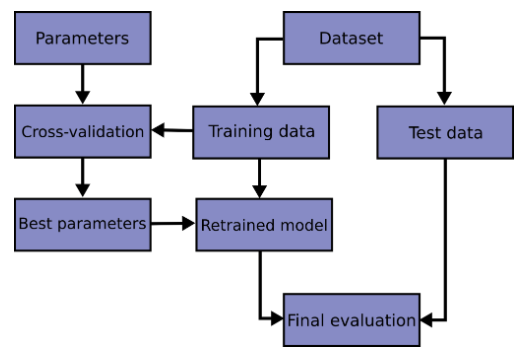

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

Reference: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0) 

Here the defualt score of the cv score is R square value.
Scores can also be specified with different evaluation metrics.
For classification task, it has different default score metrics. 

But overally, the higher the score, the better the model.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.set_title('CV Score and std error region vs Alpha')


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Try to test different range of alpha 
# alpha_space = [1e-3, 1e-2, 3e-2, 5e-2, 1e-1, 1, 3, 5, 10]
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 100)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = linear_model.Ridge(normalize=True)


# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge.alhpa
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = model_selection.cross_val_score(ridge, X_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

In [ ]:
# It seems like alpha = 0.5-0.9 work well for the ridge regression model
# So let's try with some different value of alphas
alpha = 0.06

In [ ]:
# Define ridge regression model
ridge_model = linear_model.Ridge(alpha = 0.6, normalize=True)
# Fit the model
ridge_model.fit(X_train, y_train)

In [ ]:
# Make a prediction
y_pred = ridge_model.predict(X_test)

Model evaluation

In [ ]:
# Obtain the value of MSE 
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)
R2 = ridge_model.score(X_test, y_test)
print("R2:", R2)

# Naive Bayes Models

In this section, we apply a Naive Bayes model to predict diabetes in a patient based on glucose levels and blood pressure. Although the Naive Bayes model is a probabilistic model, the steps to use it are nearly identical to what we have seen previously, namely:
1. Specify the model type
2. Fit the model to training data
3. Make predictions on test or validation data
4. Evaluate the predictions

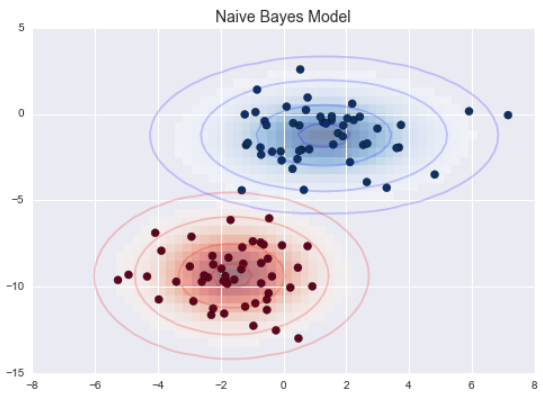

In [ ]:
nb_df = pd.read_csv("https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_10/data/NB_dataset.txt", delimiter=',')
nb_df.head()

In [ ]:
print(nb_df.describe())
print(nb_df.info())

In [ ]:
# Separate data and labels
X = nb_df[["glucose", "bloodpressure"]].to_numpy()
y = nb_df["diabetes"].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
# Specify model
nb_model = naive_bayes.GaussianNB()
# Fit the model to data
nb_model.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, clf = nb_model, ax=ax)
ax.set_xlabel('Blood Pressure')
ax.set_ylabel('Glucose')

# Adding axes annotations
fig.suptitle('Decision Boundary of Naive Bayes Model')
plt.show()

In [ ]:
# Make predictions on test data
y_pred = nb_model.predict(X_test)

**Model Evaluation**

Finally, we need to check to see how well our model is performing on the test data. For this, we evaluate our model by finding the accuracy score produced by the model.

In [ ]:
accuracy = metrics.accuracy_score(y_pred, y_test)*100
f1 = metrics.f1_score(y_test, y_pred)
# Avoid using variables with the same name as a function
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc_value = metrics.auc(fpr, tpr)

In [ ]:
print("Accuracy: ", accuracy)
print("F1: ", f1)
print("AUC: ", auc_value)

# Wrap Up

This concludes the prewritten, structured code of this notebook. The main takeaways from this session and notebook should be:
1. The process for building a model (specify type, fit, predict, evaluate)
2. Methods for dealing with data
3. Methods for evaluating models